In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read csv file and display size

data = pd.read_csv('social_data.csv')
print("Full train dataset shape is {}".format(data.shape))

Full train dataset shape is (3479, 7)


In [3]:
# display first 5 columns from csv
data.head(5)

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,03-31-2023 19:55,CSGO,TWITTER,N/A,0,0,Text
1,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
2,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
3,03-31-2023 19:49,CSGO,TWITTER,N/A,0,0,Text
4,03-31-2023 19:43,CSGO,TWITTER,Community Engagement,9517,1215,Video


In [4]:
# remove duplicates
data.drop_duplicates(subset=None, inplace=True)

# write the results to a different file
data.to_csv('social_data_cleaned.csv', index=False)

In [5]:
print("Full train dataset shape is {}".format(data.shape))
data.info()

Full train dataset shape is (3247, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3247 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Published Date     3247 non-null   object
 1   Account            3247 non-null   object
 2   Account Type       3247 non-null   object
 3   Campaign Name      3247 non-null   object
 4   Total Impressions  3247 non-null   int64 
 5   Total Engagements  3247 non-null   int64 
 6   Media Type         3247 non-null   object
dtypes: int64(2), object(5)
memory usage: 202.9+ KB


In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Published Date,3247,2411,03-01-2023 09:00,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account,3247,6,General,2092,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account Type,3247,6,TWITTER,1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Campaign Name,3247,4,Community Engagement,1391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Impressions,3247,NaN,NaN,NaN,11656.2,30462,0,384.5,2365,13276,753227
Total Engagements,3247,NaN,NaN,NaN,992.335,3555.39,0,3,47,315.5,95062
Media Type,3247,7,Photo,1396,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# separate numerical and categorical values
cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Published Date', 'Account', 'Account Type', 'Campaign Name',
       'Media Type'],
      dtype='object')
Numerical Variables:
['Total Impressions', 'Total Engagements']


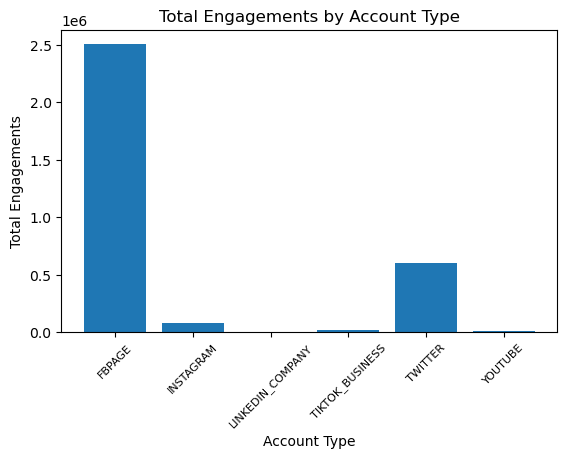

In [26]:
# display total engagement for each account type

grouped_data = data.groupby('Account Type')['Total Engagements'].sum().reset_index()

plt.bar(grouped_data['Account Type'], grouped_data['Total Engagements'])
plt.xlabel('Account Type')
plt.ylabel('Total Engagements')
plt.title('Total Engagements by Account Type')

# adjust layout of graph
plt.subplots_adjust(bottom = 0.25) 
plt.xticks(fontsize=8)
plt.xticks(rotation=45)

plt.show()


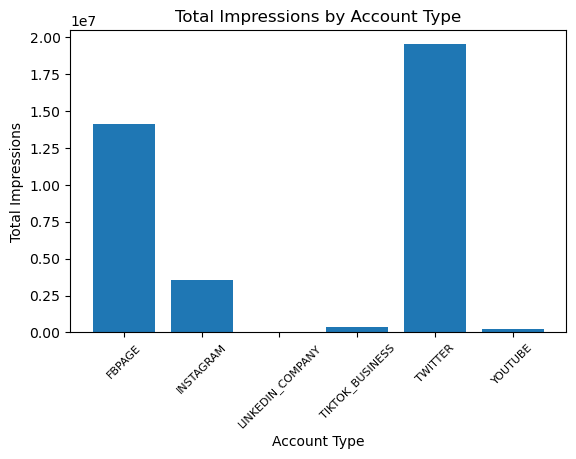

In [27]:
# display total impressions for each account type

grouped_data = data.groupby('Account Type')['Total Impressions'].sum().reset_index()

plt.bar(grouped_data['Account Type'], grouped_data['Total Impressions'])
plt.xlabel('Account Type')
plt.ylabel('Total Impressions')
plt.title('Total Impressions by Account Type')

# adjust layout of graph
plt.subplots_adjust(bottom = 0.25) 
plt.xticks(fontsize=8)
plt.xticks(rotation=45)

plt.show()

In [28]:
# calculate engagement rate for each social media platform 

# filter data for a specific account type (e.g., Twitter)
account_type = 'Twitter'
filtered_data = data[data['Account Type'] == account_type]

# calculate total engagements for the specific account type
total_engagements = filtered_data['Total Engagements'].sum()

# list accounts for each account type
accounts = filtered_data['Account'].unique().tolist()

# print total engagement and accounts for each account type
print('Total Engagements for', account_type, ':', total_engagements)
print('Accounts for', account_type, ':', accounts)

# calculate engagement rate for each day of the week 

Total Engagements for Twitter : 0
Accounts for Twitter : []


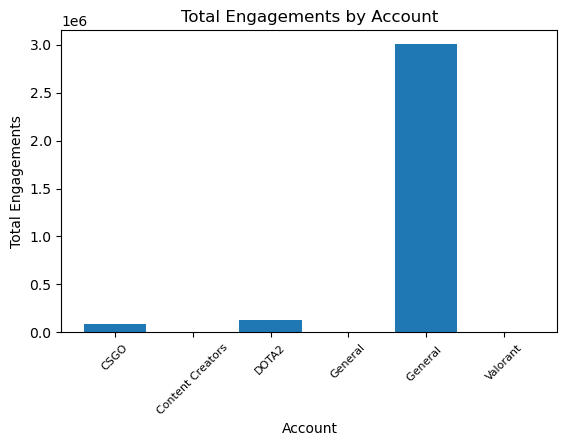

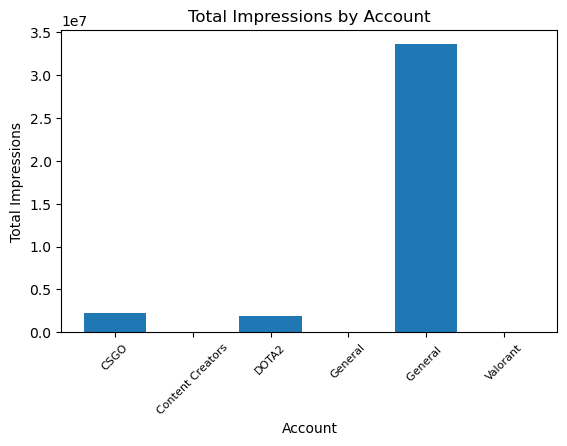

In [31]:
# display total engagement for each account

grouped_data = data.groupby('Account')['Total Engagements'].sum().reset_index()

plt.bar(grouped_data['Account'], grouped_data['Total Engagements'])
plt.xlabel('Account')
plt.ylabel('Total Engagements')
plt.title('Total Engagements by Account')

# adjust layout of graph
plt.subplots_adjust(bottom = 0.25) 
plt.xticks(fontsize=8)
plt.xticks(rotation=45)

plt.show()

# display total impressions for each account

grouped_data = data.groupby('Account')['Total Impressions'].sum().reset_index()

plt.bar(grouped_data['Account'], grouped_data['Total Impressions'])
plt.xlabel('Account')
plt.ylabel('Total Impressions')
plt.title('Total Impressions by Account')

# adjust layout of graph
plt.subplots_adjust(bottom = 0.25) 
plt.xticks(fontsize=8)
plt.xticks(rotation=45)

plt.show()

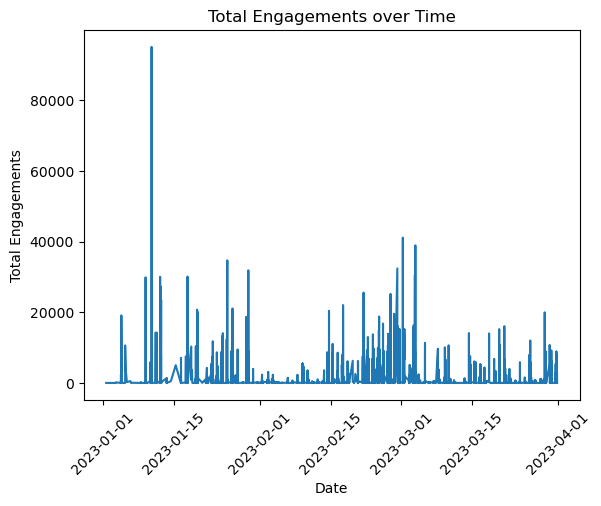

In [38]:
# convert 'Published Date' column to datetime format
data['Published Date'] = pd.to_datetime(data['Published Date'])

# sort data by the 'Published Date'
data = data.sort_values('Published Date')

# plot date and total engagement
plt.plot(data['Published Date'], data['Total Engagements'])
plt.xlabel('Date')
plt.ylabel('Total Engagements')
plt.title('Total Engagements over Time')
plt.xticks(rotation=45) 
plt.show()


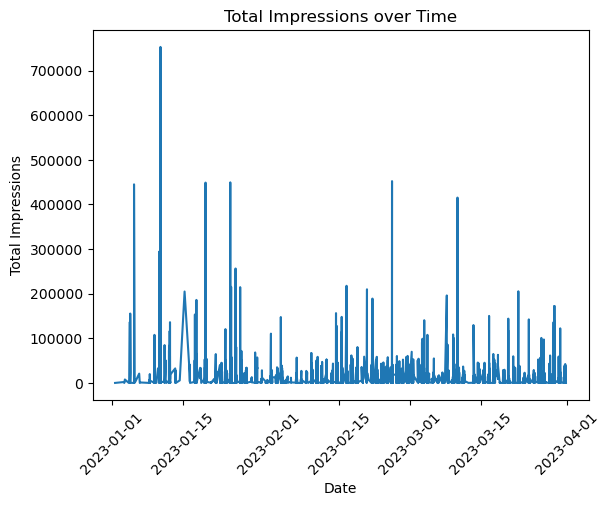

In [36]:
# convert 'Published Date' column to datetime format
data['Published Date'] = pd.to_datetime(data['Published Date'])

# sort data by 'Published Date'
data = data.sort_values('Published Date')

# plot date and total impressions
plt.plot(data['Published Date'], data['Total Impressions'])
plt.xlabel('Date')
plt.ylabel('Total Impressions')
plt.title('Total Impressions over Time')
plt.xticks(rotation=45)
plt.show()

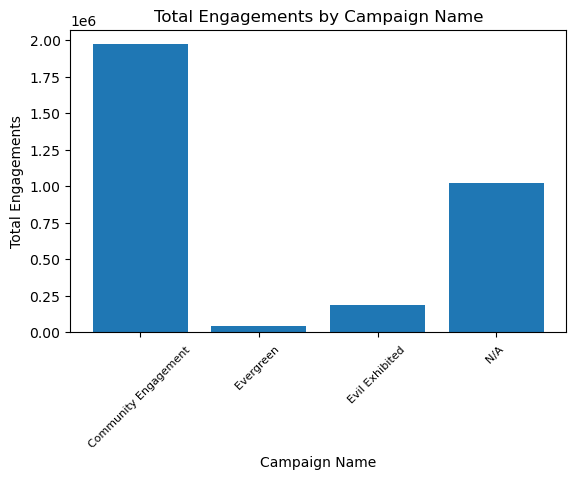

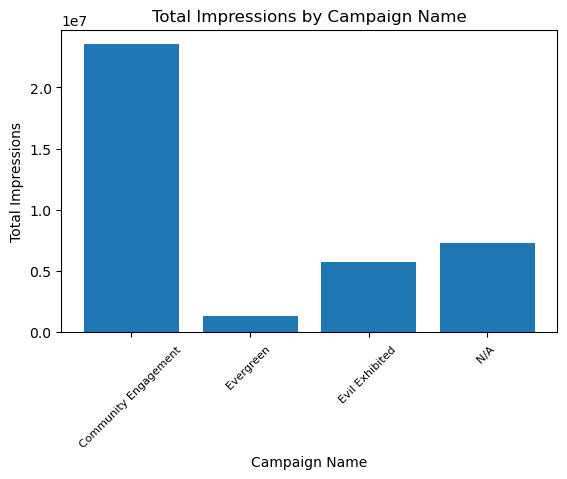

In [42]:
# display total engagement for each campaign name

grouped_data = data.groupby('Campaign Name')['Total Engagements'].sum().reset_index()

plt.bar(grouped_data['Campaign Name'], grouped_data['Total Engagements'])
plt.xlabel('Campaign Name')
plt.ylabel('Total Engagements')
plt.title('Total Engagements by Campaign Name')

# adjust layout of graph
plt.subplots_adjust(bottom = 0.25) 
plt.xticks(fontsize=8)
plt.xticks(rotation=45)

plt.show()

# display total impressions for each campaign name

grouped_data = data.groupby('Campaign Name')['Total Impressions'].sum().reset_index()

plt.bar(grouped_data['Campaign Name'], grouped_data['Total Impressions'])
plt.xlabel('Campaign Name')
plt.ylabel('Total Impressions')
plt.title('Total Impressions by Campaign Name')

# adjust layout of graph
plt.subplots_adjust(bottom = 0.25) 
plt.xticks(fontsize=8)
plt.xticks(rotation=45)

plt.show()

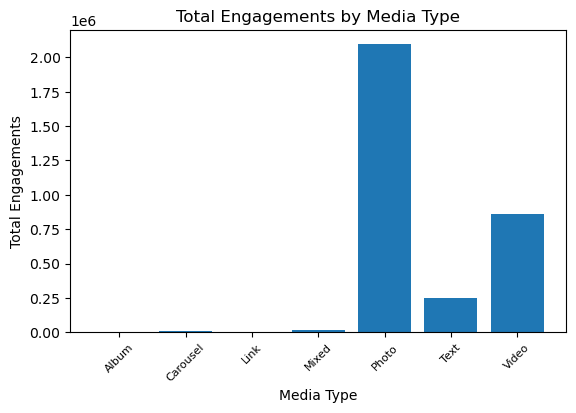

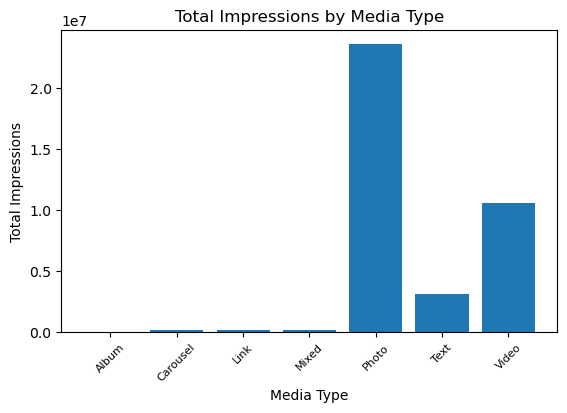

In [44]:
# display total engagement for each media type

grouped_data = data.groupby('Media Type')['Total Engagements'].sum().reset_index()

plt.bar(grouped_data['Media Type'], grouped_data['Total Engagements'])
plt.xlabel('Media Type')
plt.ylabel('Total Engagements')
plt.title('Total Engagements by Media Type')

# adjust layout of graph
plt.subplots_adjust(bottom = 0.25) 
plt.xticks(fontsize=8)
plt.xticks(rotation=45)

plt.show()

# display total impressions for each media type

grouped_data = data.groupby('Media Type')['Total Impressions'].sum().reset_index()

plt.bar(grouped_data['Media Type'], grouped_data['Total Impressions'])
plt.xlabel('Media Type')
plt.ylabel('Total Impressions')
plt.title('Total Impressions by Media Type')

# adjust layout of graph
plt.subplots_adjust(bottom = 0.25) 
plt.xticks(fontsize=8)
plt.xticks(rotation=45)

plt.show()


In [ ]:
# Convert the 'Published Date' column to datetime format
data['Published Date'] = pd.to_datetime(data['Published Date'])

# Extract the time components from the 'Published Date' column
data['Time'] = data['Published Date'].dt.time

# Sort the data by the 'Time' column
data = data.sort_values('Time')

# Plot the time and total engagements
plt.scatter(data['Time'], data['Total Engagements'])
plt.xlabel('Time')
plt.ylabel('Total Engagements')
plt.title('Total Engagements over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()